## 1. Business Problem Statement

Although total sales are increasing, the business is experiencing declining profitability.
The goal of this analysis is to identify where revenue is generated versus where profit
is lost, and to uncover patterns related to discounts, products, regions, and customers
that may explain margin erosion.

## 2. Why This Matters to the Business
Understanding profit leakage allows leadership to take immediate corrective actions,
such as adjusting discount strategies, discontinuing unprofitable products, and
reallocating inventory and marketing resources toward high-margin areas.


In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Tanishqua\Desktop\superstore-advanced-analytics\data\raw\SuperStoreDataset.csv",encoding="latin1")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 3. Dataset Overview

In [2]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,09-05-2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


# EDA
# QUESTION 1: Are sales and profit aligned?

In [3]:
df[['Sales', 'Profit']].sum()

Sales     2.297201e+06
Profit    2.863970e+05
dtype: float64

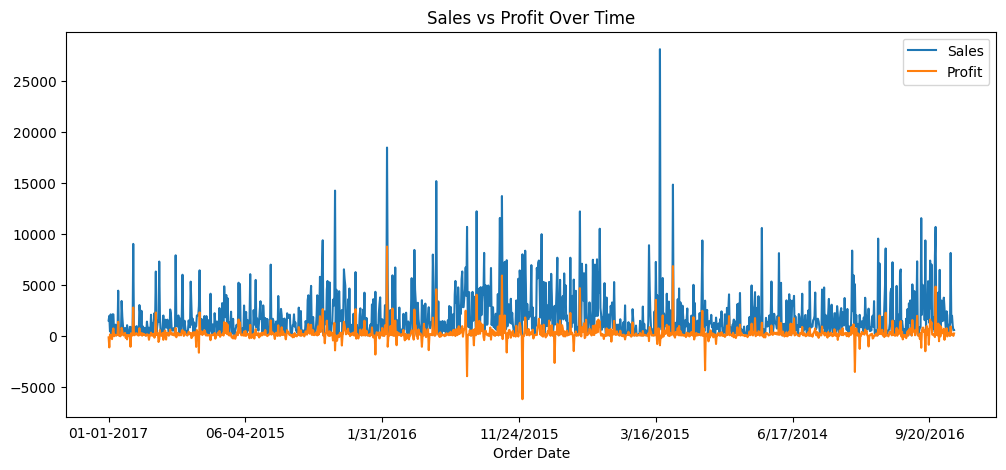

In [4]:
import matplotlib.pyplot as plt

df.groupby('Order Date')[['Sales','Profit']].sum().plot(figsize=(12,5))
plt.title("Sales vs Profit Over Time")
plt.savefig("../visualizations/eda_plots/sales_vs_profit.png")
plt.show()

Sales show an upward trend, while profit is volatile and does not grow proportionally,
indicating margin erosion despite revenue growth.

# QUESTION 2: Which categories generate profit vs loss?

In [5]:
df.groupby('Category')[['Sales','Profit']].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


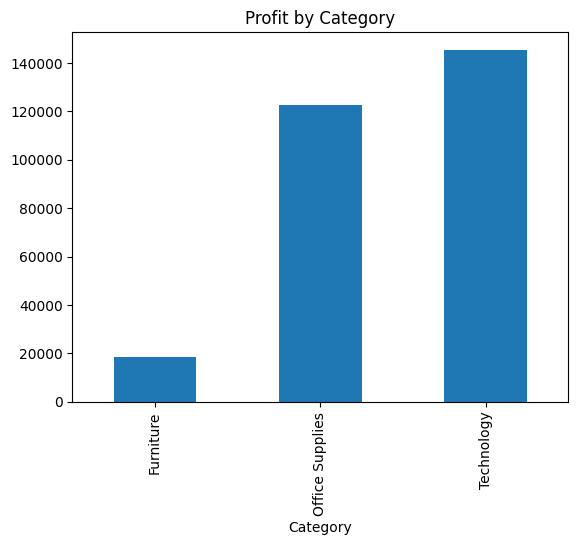

In [6]:
df.groupby('Category')['Profit'].sum().plot(kind='bar', title="Profit by Category")
plt.savefig("../visualizations/eda_plots/profit_by_category.png")
plt.show()

Not all revenue-generating categories are profitable. Some categories contribute
significant sales volume but low or negative profit.

# QUESTION 3: Are discounts destroying profit?

In [7]:
df.groupby('Discount')['Profit'].mean().head(10)

Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
Name: Profit, dtype: float64

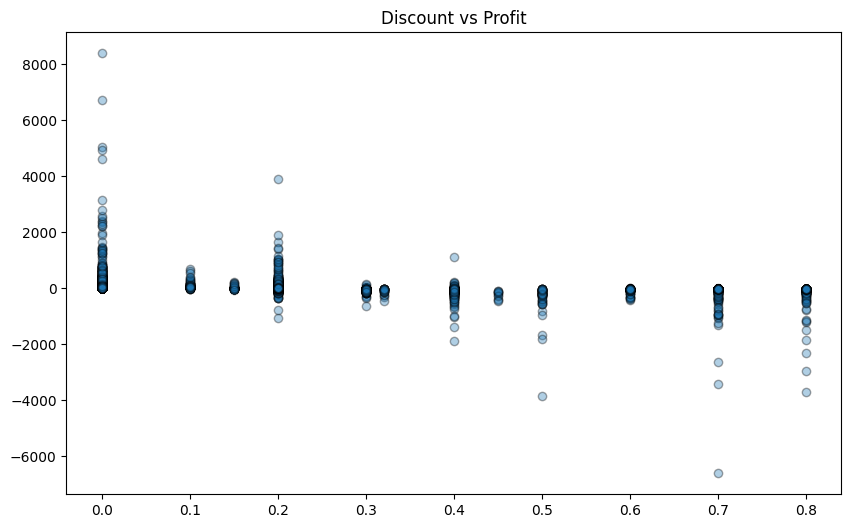

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'],df['Profit'],alpha=0.35,edgecolors='k')
plt.title("Discount vs Profit")
plt.savefig("../visualizations/eda_plots/discount_vs_profit.png")
plt.show()

Higher discount levels are strongly associated with negative profit, suggesting
that discounts are not always demand-generating and may be eroding margins.

# QUESTION 4: Which regions are risky?

In [9]:
df.groupby('Region')[['Sales','Profit']].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


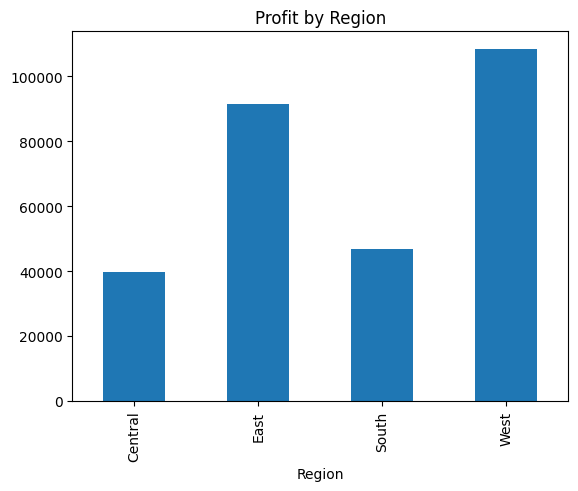

In [10]:
df.groupby('Region')['Profit'].sum().plot(kind='bar', title="Profit by Region")
plt.savefig("../visualizations/eda_plots/profit_by_region.png")
plt.show()

Certain regions generate strong sales but weak profit, indicating
operational or pricing inefficiencies.

#  QUESTION 5: Are there unprofitable customers?

In [11]:
df.groupby('Customer ID')['Profit'].sum().describe()

count     793.000000
mean      361.156396
std       894.261812
min     -6626.389500
25%        36.613100
50%       227.833800
75%       560.007800
max      8981.323900
Name: Profit, dtype: float64

1. Most customers are low-profit or break-even (25% ≤ 36 units).

2. A few customers drive most profits (max = 8981).

3. There are loss-making customers (min = -6626), which can drag overall business.

4. Profit distribution is highly skewed, which is typical in retail: a small fraction of customers give most profits.

## 4. Executive Summary of EDA Findings
Key findings from exploratory analysis:

- Sales growth does not translate directly into profit growth.
- High discount levels are a major contributor to negative margins.
- Certain categories and regions generate revenue but destroy profit.
- A subset of customers consistently generates losses.
- These findings justify deeper statistical testing, segmentation,
  forecasting, and optimization in later phases.
